In [1]:
using Distributions
using Gadfly
using Interact

In [2]:
function DistNormal(obs, u_mean, u_sd, u_min, u_max)
    return rand(Normal(u_mean, u_sd),obs)
end

function DistUniform(obs, u_mean, u_sd, u_min, u_max)
    return rand(Uniform(u_min, u_max),obs)
end

DistUniform (generic function with 1 method)

In [8]:
set_default_plot_size(25cm, 25cm)

Interact.Options{:SelectionSlider,Any}(181: "input-82" = 460 Any , "samples", 460, "460", 10, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("10"=>10,"60"=>60,"110"=>110,"160"=>160,"210"=>210,"260"=>260,"310"=>310,"360"=>360,"410"=>410,"460"=>460…), Dict{Any,Any}(Pair{Any,Any}(310, "310"),Pair{Any,Any}(810, "810"),Pair{Any,Any}(410, "410"),Pair{Any,Any}(760, "760"),Pair{Any,Any}(210, "210"),Pair{Any,Any}(360, "360"),Pair{Any,Any}(160, "160"),Pair{Any,Any}(560, "560"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(60, "60")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(183: "input-83" = 410 Any , "observations", 410, "410", 5, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("10"=>10,"110"=>110,"210"=>210,"310"=>310,"410"=>410,"510"=>510,"610"=>610,"710"=>710,"810"=>810,"910"=>910…), Dict{Any,Any}(Pair{Any,Any}(310, "310"),Pair{Any,Any}(510, "510"),Pair{Any,Any}(810, "810"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(410, "410"),Pair{Any,Any}(610, "610"),Pair{Any,Any}(210, "210"),Pair{Any,Any}(110, "110"),Pair{Any,Any}(910, "910"),Pair{Any,Any}(710, "710")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(185: "input-84" = 5 Any , "β0", 5, "5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(187: "input-85" = 0.5 Any , "β1", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(189: "input-86" = -5 Any , "u_min", -5, "-5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-10"=>-10,"-9"=>-9,"-8"=>-8,"-7"=>-7,"-6"=>-6,"-5"=>-5,"-4"=>-4,"-3"=>-3,"-2"=>-2,"-1"=>-1…), Dict{Any,Any}(Pair{Any,Any}(-1, "-1"),Pair{Any,Any}(-7, "-7"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(-4, "-4"),Pair{Any,Any}(-3, "-3"),Pair{Any,Any}(-9, "-9"),Pair{Any,Any}(-6, "-6"),Pair{Any,Any}(-8, "-8"),Pair{Any,Any}(-10, "-10"),Pair{Any,Any}(-2, "-2")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(191: "input-87" = 5 Any , "u_max", 5, "5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(193: "input-88" = 0 Any , "u_μ", 0, "0", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-5"=>-5,"-4"=>-4,"-3"=>-3,"-2"=>-2,"-1"=>-1,"0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(-1, "-1"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(-4, "-4"),Pair{Any,Any}(-3, "-3"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(-2, "-2"),Pair{Any,Any}(-5, "-5")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(195: "input-89" = 3 Any , "u_σ", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

Interact.Options{:ToggleButtons,Any}(197: "input-90" = DistNormal Any , "u_dist", DistNormal, "normal", 0, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("normal"=>DistNormal,"uniform"=>DistUniform), Dict{Any,Any}(Pair{Any,Any}(DistNormal, "normal"),Pair{Any,Any}(DistUniform, "uniform"))), Any[], Any[], true, "horizontal")

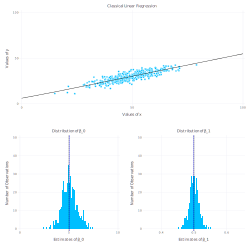

In [15]:
@manipulate for samples in 10:50:1000, observations in 10:100:1000, β0 in 0:10, β1 in 0:0.1:1, u_min in -10:0, 
    u_max in 0:10, u_μ in -5:5, u_σ in 1:5, u_dist=[:normal => DistNormal, :uniform => DistUniform]
    
    # Create lists for values of β_0 and β_1
    β0_hat = []
    β1_hat = []
    
    # Bringing x-values outside loop in order to impose less stringent assumption
    x_values = rand(Normal(50,10),observations)
    
    # Collect values of β among different samples
    for sample in 1:1:samples 
    
        ## Initial
        u = u_dist(observations, u_μ, u_σ, u_min, u_max)
        y_values = β0 + β1 * x_values + u
        
        ## Classical Linear Regression
        X = [ones(x_values) x_values]
        β = inv(X'*X)*X'*y_values
        
        ## Save values
        push!(β0_hat, β[1])
        push!(β1_hat, β[2])
    
    end    
    
    # Plot
    
    ## Example values
    u = u_dist(observations, u_μ, u_σ, u_min, u_max)
    y_values = β0 + β1 * x_values + u
    X = [ones(x_values) x_values]
    β = inv(X'*X)*X'*y_values
    
    # CLR graph
    graph_CLR = plot(
        layer(x=x_values, y=y_values, Geom.point, order=1),
        layer(x=[0; x_values; 100], y=[X[:1]; X; [1 100]]*β, Geom.line, order=2, Theme(default_color=colorant"black", line_width=1pt)),
        Guide.XLabel("Values of x"),
        Guide.YLabel("Values of y"),
        Guide.Title("Classical Linear Regression"),
        Coord.Cartesian(xmin=0 , xmax=100, ymin=0, ymax=100)
    )
    
    # Distribtuion of β_0
    graph_β_0 = plot(
        layer(x=β0_hat, Geom.histogram(bincount=50), order=1),
        layer(xintercept=[β0], Geom.vline(color=["black"], style=[[1mm]], size=[.5mm]), order=2),
        layer(xintercept=[mean(β0_hat)], Geom.vline(color=["blue"], style=[[1mm]], size=[.5mm]), order=3),
        Guide.XLabel("Estimates of β_0"),
        Guide.YLabel("Number of Observations"),
        Guide.Title("Distribution of β_0"),
        Coord.Cartesian(xmin=0 , xmax=10, ymin=0, ymax = 50)
    )
    
    # Distribtuion of β_1
    graph_β_1 = plot(
        layer(x=β1_hat, Geom.histogram(bincount=50), order=1),
        layer(xintercept=[β1], Geom.vline(color=["black"], style=[[1mm]], size=[.5mm]), order=2),
        layer(xintercept=[mean(β1_hat)], Geom.vline(color=["blue"], style=[[1mm]], size=[.5mm]), order=3),
        Guide.XLabel("Estimates of β_1"),
        Guide.YLabel("Number of Observations"),
        Guide.Title("Distribution of β_1"),
        Coord.Cartesian(xmin=0.35 , xmax=0.65, ymin=0, ymax = 50)
    )
    
    vstack(graph_CLR, hstack(graph_β_0, graph_β_1))
    
end

<br>

In [ ]:
hstack(